# Objetivo del notebook

Haremos un análisis de los datos de orders.csv, para entrenar un modelo de machine learning para automatizar algunos procesos para mejorar la experiencia de compra y los procesos internos. para lo cual requiere.


# Contenido del Notebook

1. Importanción de librerías y dataset

2. Comprensión básica de los datos

3. Análisis exploratorio de datos (EDA)

4. Ingeniería de características

5. Preprocesamiento de datos

6. Elaboración de modelos

7. Comprobación del rendimiento del modelo

8. Ajuste de hiperparámetros del modelo

9. Predicción de datos de prueba utilizando el mejor modelo

10. Conclusiones

# 1. Importamos librerías y dataset


In [2]:
# Data analysis libraries
import re
import numpy as np
import pandas as pd
import math
from scipy import stats
from tabulate import tabulate
from io import StringIO

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read csv file
path = "/work/orders_version2.csv"
df_pedidos = pd.read_csv(path)

# 2. Comprensión básica de los datos


2.1 Descripción de los datos

2.2 Valores únicos de cada columna

2.3 Comprobación de las dimensiones de los datos

2.4 Visualización del conjunto de datos

2.5 Comprobación de tipos de datos

▫️ Categóricos

▫️ Numéricos

▫️ Tipos de datos mixtos

▫️ Errores o erratas

2.6 Comprobación de datos duplicados

2.7 Comprobación del número total y el porcentaje de valores omitidos

2.8 Comprobación de la cardinalidad de las características categóricas

## 2.1. Descripción de los datos


In [4]:
df_pedidos.describe

<bound method NDFrame.describe of       increment_id  store_id  customer_magento_id  \
0        100000002       1.0                  NaN   
1        100000002       1.0                  NaN   
2        100000004       1.0                  NaN   
3        100000005       1.0                  NaN   
4        100000035       1.0                  NaN   
...            ...       ...                  ...   
63802   1000064229       1.0                  NaN   
63803   1000064231       1.0                  NaN   
63804   1000064234       1.0                  NaN   
63805   1000064237       1.0                  NaN   
63806   1000064238       1.0                  NaN   

                      customer_email_id shipping_description  \
0      f32338f0d3733a4faa884debce589c6b                  NaN   
1      f32338f0d3733a4faa884debce589c6b                  NaN   
2      f32338f0d3733a4faa884debce589c6b                  NaN   
3      f32338f0d3733a4faa884debce589c6b                  NaN   
4      84

In [5]:
# Metodo describe()
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63807 entries, 0 to 63806
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   increment_id             63807 non-null  object 
 1   store_id                 63719 non-null  float64
 2   customer_magento_id      21703 non-null  float64
 3   customer_email_id        63807 non-null  object 
 4   shipping_description     27507 non-null  object 
 5   base_discount_amount     63807 non-null  float64
 6   discount_description     6178 non-null   object 
 7   base_row_total_incl_tax  63575 non-null  float64
 8   base_shipping_amount     63807 non-null  float64
 9   shipping_method          51296 non-null  object 
 10  base_tax_amount          38668 non-null  float64
 11  base_total_canceled      94 non-null     float64
 12  customer_is_guest        63807 non-null  int64  
 13  sku                      63807 non-null  object 
 14  name                  

In [ ]:
df_pedidos.isnull().any()

increment_id               False
store_id                    True
customer_magento_id         True
customer_email_id          False
shipping_description        True
base_discount_amount       False
discount_description        True
base_row_total_incl_tax     True
base_shipping_amount       False
shipping_method             True
base_tax_amount             True
base_total_canceled         True
customer_is_guest          False
sku                        False
name                       False
qty_ordered                False
payment_method             False
city                        True
postcode                    True
country_id                  True
dtype: bool

## 2.2. Valores únicos de cada columna


In [ ]:
#Valores unicos
df_pedidos.nunique()

increment_id               32551
store_id                       7
customer_magento_id         1986
customer_email_id          17701
shipping_description          59
base_discount_amount        2269
discount_description         191
base_row_total_incl_tax     6134
base_shipping_amount         590
shipping_method               24
base_tax_amount             3425
base_total_canceled            2
customer_is_guest              2
sku                         8475
name                        9886
qty_ordered                  153
payment_method               100
city                        5840
postcode                    4769
country_id                    32
dtype: int64

## 2.3. Comprobación de las dimensiones de los datos

In [ ]:
# Number of rows and columns in dataset
df_pedidos.shape

(63807, 20)

## 2.4. Visualización del conjunto de datos


In [6]:
df_pedidos.head()

,increment_id,store_id,customer_magento_id,customer_email_id,shipping_description,base_discount_amount,discount_description,base_row_total_incl_tax,base_shipping_amount,shipping_method,base_tax_amount,base_total_canceled,customer_is_guest,sku,name,qty_ordered,payment_method,city,postcode,country_id
0,100000002,1.0,NaN,f32338f0d3733a4faa884debce589c6b,NaN,0.0,NaN,24.20,0.0,flatrate_flatrate,NaN,NaN,0,Ginebra_Nordes,GINEBRA NORDÉS,1.0000,sequrapayment,segovia,40002,ES
1,100000002,1.0,NaN,f32338f0d3733a4faa884debce589c6b,NaN,0.0,NaN,88.90,0.0,flatrate_flatrate,NaN,NaN,0,VALBUENA09,VINO TINTO VEGA SICILIA VALBUENA 5º AÑO 2009,1.0000,sequrapayment,segovia,40002,ES
2,100000004,1.0,NaN,f32338f0d3733a4faa884debce589c6b,NaN,0.0,NaN,4.49,0.0,flatrate_flatrate,NaN,NaN,0,VB-LDM13,VINO BLANCO LÁGRIMAS DE MARÍA 2013,1.0000,paypal_standard,segovia,40002,ES
3,100000005,1.0,NaN,f32338f0d3733a4faa884debce589c6b,NaN,0.0,NaN,4.40,0.0,flatrate_flatrate,NaN,NaN,0,Martivilli,VINO BLANCO MARTIVILLI 2013,1.0000,cashondelivery,segovia,40002,ES
4,100000035,1.0,NaN,8401ce7104e094510c2b1d284701bb6b,NaN,0.0,NaN,35.76,0.0,flatrate_flatrate,NaN,NaN,0,CarmeloRodero_Valtarreñas2009,VINO TINTO CARMELO RODERO PAGO DE VALTARREÑAS ...,1.0000,serviredpro,Burgos,09005,ES


## 2.5. Comprobación de tipos de datos

In [7]:
df_pedidos.dtypes

increment_id                object
store_id                   float64
customer_magento_id        float64
customer_email_id           object
shipping_description        object
base_discount_amount       float64
discount_description        object
base_row_total_incl_tax    float64
base_shipping_amount       float64
shipping_method             object
base_tax_amount            float64
base_total_canceled        float64
customer_is_guest            int64
sku                         object
name                        object
qty_ordered                 object
payment_method              object
city                        object
postcode                    object
country_id                  object
dtype: object

## 2.6. Comprobación de datos duplicados

In [ ]:
#valores nulos de cada columna
df_pedidos.isnull().sum()

increment_id                   0
store_id                      88
customer_magento_id        42104
customer_email_id              0
shipping_description       36300
base_discount_amount           0
discount_description       57629
base_row_total_incl_tax      232
base_shipping_amount           0
shipping_method            12511
base_tax_amount            25139
base_total_canceled        63713
customer_is_guest              0
sku                            0
name                           0
qty_ordered                    0
payment_method                 0
city                       11162
postcode                   11248
country_id                 11238
dtype: int64

In [ ]:
# Calcula el número de valores nulos en cada columna
nulos_por_columna = df_pedidos.isnull().sum()

# Encuentra las columnas con más de 30000 valores nulos
columnas_a_eliminar = nulos_por_columna[nulos_por_columna > 30000].index

# Elimina esas columnas del DataFrame
df_pedidos.drop(columns=columnas_a_eliminar, inplace = True)

#valores nulos de cada columna
df_pedidos.isnull().sum()

increment_id                   0
store_id                      88
customer_email_id              0
base_discount_amount           0
base_row_total_incl_tax      232
base_shipping_amount           0
shipping_method            12511
base_tax_amount            25139
customer_is_guest              0
sku                            0
name                           0
qty_ordered                    0
payment_method                 0
city                       11162
postcode                   11248
country_id                 11238
dtype: int64

In [ ]:
# Rellenar valores nulos en columnas de tipo string con una cadena vacía
for columna in df_pedidos.select_dtypes(include=['object']).columns:
    df_pedidos[columna] = df_pedidos[columna].fillna('')

# Rellenar valores nulos en columnas booleanas con False
for columna in df_pedidos.select_dtypes(include=['bool']).columns:
    df_pedidos[columna] = df_pedidos[columna].fillna(False)

# Rellenar valores nulos en columnas numéricas con la media
for columna in df_pedidos.select_dtypes(include=['float64', 'int64']).columns:
    df_pedidos[columna] = df_pedidos[columna].fillna(df_pedidos[columna].mean())

#valores nulos de cada columna
df_pedidos.isnull().sum()

increment_id               0
store_id                   0
customer_email_id          0
base_discount_amount       0
base_row_total_incl_tax    0
base_shipping_amount       0
shipping_method            0
base_tax_amount            0
customer_is_guest          0
sku                        0
name                       0
qty_ordered                0
payment_method             0
city                       0
postcode                   0
country_id                 0
dtype: int64

### Se importan los datos sin nulos de orders

In [ ]:
df_pedidos.to_csv('/work/orders_sin_nulos.csv', index=False)

In [ ]:
df_pedidos = pd.read_csv("/work/orders_sin_nulos.csv")
df_pedidos

,increment_id,store_id,customer_email_id,base_discount_amount,base_row_total_incl_tax,base_shipping_amount,shipping_method,base_tax_amount,customer_is_guest,sku,name,qty_ordered,payment_method,city,postcode,country_id
0,100000002,1.0,f32338f0d3733a4faa884debce589c6b,0.0,24.20,0.0,flatrate_flatrate,34.341623,0,Ginebra_Nordes,GINEBRA NORDÉS,1.0000,sequrapayment,segovia,40002,ES
1,100000002,1.0,f32338f0d3733a4faa884debce589c6b,0.0,88.90,0.0,flatrate_flatrate,34.341623,0,VALBUENA09,VINO TINTO VEGA SICILIA VALBUENA 5º AÑO 2009,1.0000,sequrapayment,segovia,40002,ES
2,100000004,1.0,f32338f0d3733a4faa884debce589c6b,0.0,4.49,0.0,flatrate_flatrate,34.341623,0,VB-LDM13,VINO BLANCO LÁGRIMAS DE MARÍA 2013,1.0000,paypal_standard,segovia,40002,ES
3,100000005,1.0,f32338f0d3733a4faa884debce589c6b,0.0,4.40,0.0,flatrate_flatrate,34.341623,0,Martivilli,VINO BLANCO MARTIVILLI 2013,1.0000,cashondelivery,segovia,40002,ES
4,100000035,1.0,8401ce7104e094510c2b1d284701bb6b,0.0,35.76,0.0,flatrate_flatrate,34.341623,0,CarmeloRodero_Valtarreñas2009,VINO TINTO CARMELO RODERO PAGO DE VALTARREÑAS ...,1.0000,serviredpro,Burgos,09005,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63802,1000064229,1.0,1660b76605e62def2a9b6da217b345f2,0.0,24.00,0.0,NaN,2.180000,1,DEGUSTACION-VINO-Y-TAPAS,Degustación 3 copas de vino + 3 tapas para con...,2.0000,multisafepay_creditcard,NaN,NaN,NaN
63803,1000064231,1.0,9d82279dc9812dcc49e08bffd27ee5d8,0.0,150.00,0.0,NaN,13.640000,1,CATA_CERVEZAS_ARTESANAS,Cata de Cervezas Artesanas + Degustación de Qu...,6.0000,multisafepay_creditcard,NaN,NaN,NaN
63804,1000064234,1.0,d7e63535f120451f6b68155c7127d2f7,0.0,59.80,0.0,NaN,5.440000,1,cata-iniciacion-vino,Cata de Iniciación al mundo del vino + Degusta...,2.0000,multisafepay_creditcard,NaN,NaN,NaN
63805,1000064237,1.0,6684d77d22ad6cd9a2f5ddca09e19cc3,0.0,36.00,0.0,NaN,3.270000,1,3-CERVEZAS-3-TAPAS-MADRID,Degustación 3 Cervezas Artesanas + 3 Tapas - P...,3.0000,multisafepay_creditcard,NaN,NaN,NaN


# 3. Análisis exploratorio de datos (EDA)

In [ ]:
#Valores unicos
df_pedidos.nunique()

increment_id               32551
store_id                       8
customer_email_id          17701
base_discount_amount        2269
base_row_total_incl_tax     6135
base_shipping_amount         590
shipping_method               24
base_tax_amount             3426
customer_is_guest              2
sku                         8475
name                        9886
qty_ordered                  153
payment_method               100
city                        5840
postcode                    4769
country_id                    32
dtype: int64

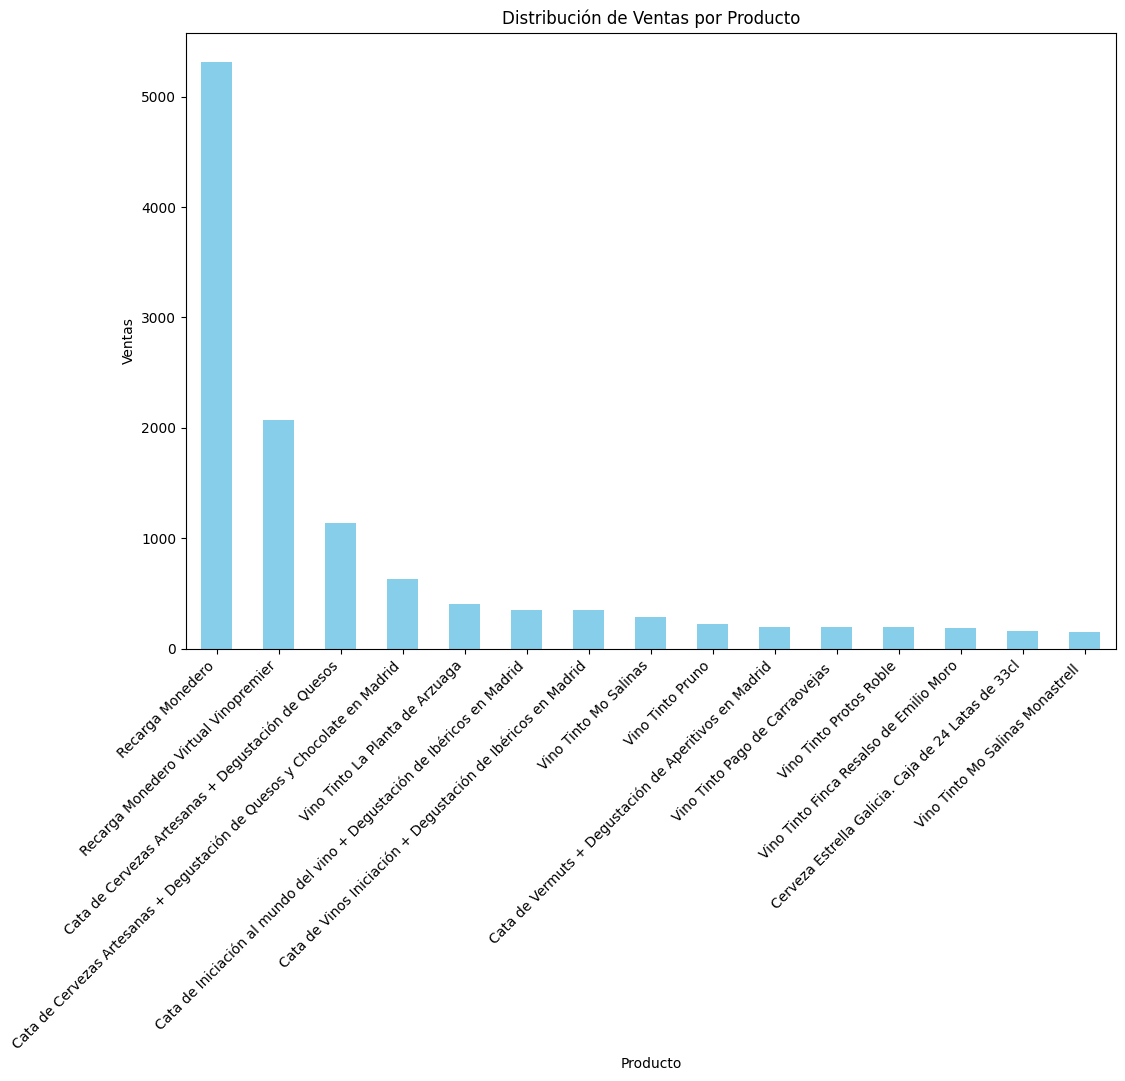

In [ ]:
df_pedidos['name'] = df_pedidos['name'].astype(str)  # Asegúrate de que la columna sea de tipo cadena

# Calcular la cantidad de ventas por nombre de producto
ventas_por_producto = df_pedidos['name'].value_counts()

# gráfico de barras
plt.figure(figsize=(12, 8))
ventas_por_producto[:15].plot(kind='bar', color='skyblue')  
plt.title('Distribución de Ventas por Producto')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right') 
plt.show()

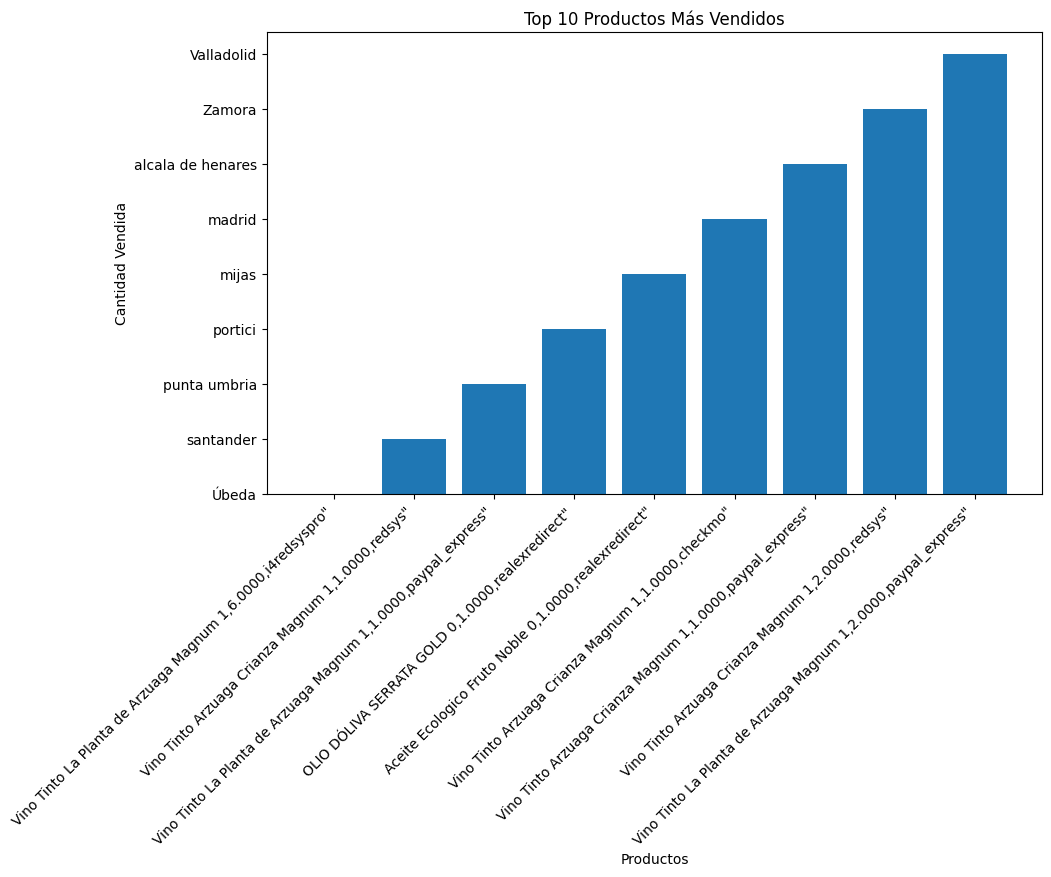

In [ ]:
top_products = df_pedidos.sort_values(by='qty_ordered', ascending=False).head(10)

#Gráfico de barras para los productos más vendidos
plt.figure(figsize=(10, 6))
plt.bar(top_products['name'], top_products['qty_ordered'])
plt.xlabel('Productos')
plt.ylabel('Cantidad Vendida')
plt.title('Top 10 Productos Más Vendidos')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df_pedidos = pd.read_csv("/work/orders_sin_nulos.csv")
df_pedidos

,increment_id,store_id,customer_email_id,base_discount_amount,base_row_total_incl_tax,base_shipping_amount,shipping_method,base_tax_amount,customer_is_guest,sku,name,qty_ordered,payment_method,city,postcode,country_id
0,100000002,1.0,f32338f0d3733a4faa884debce589c6b,0.0,24.20,0.0,flatrate_flatrate,34.341623,0,Ginebra_Nordes,GINEBRA NORDÉS,1.0000,sequrapayment,segovia,40002,ES
1,100000002,1.0,f32338f0d3733a4faa884debce589c6b,0.0,88.90,0.0,flatrate_flatrate,34.341623,0,VALBUENA09,VINO TINTO VEGA SICILIA VALBUENA 5º AÑO 2009,1.0000,sequrapayment,segovia,40002,ES
2,100000004,1.0,f32338f0d3733a4faa884debce589c6b,0.0,4.49,0.0,flatrate_flatrate,34.341623,0,VB-LDM13,VINO BLANCO LÁGRIMAS DE MARÍA 2013,1.0000,paypal_standard,segovia,40002,ES
3,100000005,1.0,f32338f0d3733a4faa884debce589c6b,0.0,4.40,0.0,flatrate_flatrate,34.341623,0,Martivilli,VINO BLANCO MARTIVILLI 2013,1.0000,cashondelivery,segovia,40002,ES
4,100000035,1.0,8401ce7104e094510c2b1d284701bb6b,0.0,35.76,0.0,flatrate_flatrate,34.341623,0,CarmeloRodero_Valtarreñas2009,VINO TINTO CARMELO RODERO PAGO DE VALTARREÑAS ...,1.0000,serviredpro,Burgos,09005,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63802,1000064229,1.0,1660b76605e62def2a9b6da217b345f2,0.0,24.00,0.0,NaN,2.180000,1,DEGUSTACION-VINO-Y-TAPAS,Degustación 3 copas de vino + 3 tapas para con...,2.0000,multisafepay_creditcard,NaN,NaN,NaN
63803,1000064231,1.0,9d82279dc9812dcc49e08bffd27ee5d8,0.0,150.00,0.0,NaN,13.640000,1,CATA_CERVEZAS_ARTESANAS,Cata de Cervezas Artesanas + Degustación de Qu...,6.0000,multisafepay_creditcard,NaN,NaN,NaN
63804,1000064234,1.0,d7e63535f120451f6b68155c7127d2f7,0.0,59.80,0.0,NaN,5.440000,1,cata-iniciacion-vino,Cata de Iniciación al mundo del vino + Degusta...,2.0000,multisafepay_creditcard,NaN,NaN,NaN
63805,1000064237,1.0,6684d77d22ad6cd9a2f5ddca09e19cc3,0.0,36.00,0.0,NaN,3.270000,1,3-CERVEZAS-3-TAPAS-MADRID,Degustación 3 Cervezas Artesanas + 3 Tapas - P...,3.0000,multisafepay_creditcard,NaN,NaN,NaN


In [ ]:
df_pedidos.columns

Index(['increment_id', 'store_id', 'customer_email_id', 'base_discount_amount',
       'base_row_total_incl_tax', 'base_shipping_amount', 'shipping_method',
       'base_tax_amount', 'customer_is_guest', 'sku', 'name', 'qty_ordered',
       'payment_method', 'city', 'postcode', 'country_id'],
      dtype='object')

In [ ]:
df_pedidos.nunique()

increment_id               32551
store_id                       8
customer_email_id          17701
base_discount_amount        2269
base_row_total_incl_tax     6135
base_shipping_amount         590
shipping_method               24
base_tax_amount             3426
customer_is_guest              2
sku                         8475
name                        9886
qty_ordered                  153
payment_method               100
city                        5840
postcode                    4769
country_id                    32
dtype: int64

In [ ]:
df_pedidos.info()#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63807 entries, 0 to 63806
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   increment_id             63807 non-null  object 
 1   store_id                 63807 non-null  float64
 2   customer_email_id        63807 non-null  object 
 3   base_discount_amount     63807 non-null  float64
 4   base_row_total_incl_tax  63807 non-null  float64
 5   base_shipping_amount     63807 non-null  float64
 6   shipping_method          51296 non-null  object 
 7   base_tax_amount          63807 non-null  float64
 8   customer_is_guest        63807 non-null  int64  
 9   sku                      63807 non-null  object 
 10  name                     63807 non-null  object 
 11  qty_ordered              63807 non-null  object 
 12  payment_method           63807 non-null  object 
 13  city                     52645 non-null  object 
 14  postcode              

In [ ]:
# Determinamos las columnas categoricas cardinales que no se pueden codificar en one_hot
columnas_cat_cardinales = [
    "customer_email_id",
    "shipping_method",
    "sku",
    "name",
    "payment_method",
    "city",
    "country_id"
]

In [ ]:
# Codificamos las cats. cardinales.


# Importamos el CSV de productos para limpiarlo

In [ ]:
df_productos = pd.read_csv("/work/productos.csv")
df_productos

,SKU,name,created_at,description,short_description,meta_title,url,final_price,cost,biodinamico,...,puntos_peñin,formato_presentacion,precio_proveedor,recomendado,region,tipo_champagne,tipo_vino,tipo_whisky,vista,zona_produccion_cava
0,WAECO-MF-6W,Vinoteca Waeco Mf-6w 6 Botellas,"8/24/15, 1:04 AM",VINOTECA WAECO MF-6W 6 BOTELLASEn el armario a...,VINOTECA WAECO MF-6W 6 BOTELLASEn el armario a...,NaN,https://vinopremier.com/vinotecas/neveras-para...,182.57,107.78,No,...,NaN,NaN,107.78,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
1,Vinotecad50dometic,Vinoteca Dometic D50 46-62 Botellas,"8/24/15, 1:05 AM",VINOTECA DOMETIC D50 46-62 BOTELLASEsta vinote...,VINOTECA DOMETIC D50 46-62 BOTELLASEsta vinote...,NaN,https://vinopremier.com/vinotecas/neveras-para...,773.50,456.57,No,...,NaN,NaN,456.57,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
2,Vinotecad15dometic,Vinoteca Dometic D15 16-23 Botellas,"8/24/15, 1:05 AM",VINOTECA DOMETIC D15 16-23 BOTELLASEsta vinote...,VINOTECA DOMETIC D15 16-23 BOTELLASEsta vinote...,NaN,https://vinopremier.com/vinotecas/neveras-para...,618.00,388.00,No,...,NaN,NaN,388.00,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
3,Vinobox_40_PC_1T,Vinoteca Vinobox 40 Botellas,"8/24/15, 1:05 AM",VINOTECA VINOBOX 40 BOTELLASLa Vinoteca Vinobo...,VINOTECA VINOBOX 40 BOTELLASLa Vinoteca Vinobo...,Vinoteca Vinobox 40 Botellas,https://vinopremier.com/vinotecas/neveras-para...,506.32,267.21,No,...,NaN,NaN,267.21,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
4,Vinobox_40_GC_2T,Climatizador de Vino Vinobox CV40GCE 2Temperat...,"8/24/15, 1:05 AM",VINOTECA VINOBOX GC 40 BOTELLAS 2 ZONAS DE TEM...,VINOTECA VINOBOX GC 40 BOTELLAS 2 ZONAS DE TEM...,NaN,https://vinopremier.com/vinotecas/neveras-para...,790.45,466.91,No,...,NaN,NaN,466.91,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10570,VG-CREAM-PALO-CORTADO-CAYETANO-Y-CIA,Vino Cream Cayetano del Pino & Cia,"12/7/23, 9:50 AM",<p><strong>Cayetano del Pino & Cia</strong><sp...,<p><strong>Cayetano del Pino & Cia</strong><sp...,Comprar Vino Cream Cayetano del Pino & Cia al ...,https://vinopremier.com/vinos/variedades-de-uv...,23.00,10.14,No,...,NaN,Botella 75cl,10.14,NaN,Jerez,NaN,Vino Generoso,NaN,De color ámbar con ribetes verdosos y brillante.,NaN
10571,VT-MACAN,Vino Tinto Macán,"12/14/23, 12:27 PM","<p><span style=""font-weight: 400;""><strong>Veg...","<p><span style=""font-weight: 400;""><strong>Veg...",Comprar Vino Tinto Macán al mejor precio,https://vinopremier.com/vinos/variedades-de-uv...,71.15,52.25,No,...,NaN,Botella 75cl,52.25,NaN,NaN,NaN,Vino Tinto,NaN,NaN,NaN
10572,VB-ANARES-TERRANOVA-SAUVIGNON-BLANC,Vino Blanco Añares Terranova Sauvignon Blanc,"12/26/23, 11:10 AM","<p dir=""ltr"">El <strong>Vino Blanco Añares Ter...",<p>El <strong>Vino Blanco Añares Terranova Sau...,Comprar Vino Blanco Añares Terranova Sauvignon...,https://vinopremier.com/vinos/denominaciones/d...,4.19,3.05,No,...,NaN,Botella 75cl,3.05,NaN,NaN,NaN,Vino Blanco,NaN,Añares Terra Nova Sauvignon blanc presenta col...,NaN
10573,VT-CACHITOMIO,Vino Tinto Cachito Mio,"1/9/24, 2:41 AM","<p>El <strong>Vino Tinto Cachito Mío</strong>,...","<p>El <strong>Vino Tinto Cachito Mío</strong>,...",Comprar Vino Tinto Cachito Mio al mejor precio,https://vinopremier.com/vinos/denominaciones/d...,17.60,12.90,No,...,90.0,Botella 75cl,12.90,NaN,NaN,NaN,Vino Tinto,NaN,De color rojo picota con reflejos violáceos.,NaN


In [ ]:
try:
    df_productos.drop(["description", "short_description", "url", "image"], axis = 1, inplace = True)
except:
    pass
df_productos



,SKU,name,created_at,meta_title,final_price,cost,biodinamico,alergenos,uvas,proveedor,...,puntos_peñin,formato_presentacion,precio_proveedor,recomendado,region,tipo_champagne,tipo_vino,tipo_whisky,vista,zona_produccion_cava
0,WAECO-MF-6W,Vinoteca Waeco Mf-6w 6 Botellas,"8/24/15, 1:04 AM",NaN,182.57,107.78,No,NaN,NaN,"Dometic Spain, S.L.",...,NaN,NaN,107.78,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
1,Vinotecad50dometic,Vinoteca Dometic D50 46-62 Botellas,"8/24/15, 1:05 AM",NaN,773.50,456.57,No,NaN,NaN,"Dometic Spain, S.L.",...,NaN,NaN,456.57,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
2,Vinotecad15dometic,Vinoteca Dometic D15 16-23 Botellas,"8/24/15, 1:05 AM",NaN,618.00,388.00,No,NaN,NaN,"Dometic Spain, S.L.",...,NaN,NaN,388.00,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
3,Vinobox_40_PC_1T,Vinoteca Vinobox 40 Botellas,"8/24/15, 1:05 AM",Vinoteca Vinobox 40 Botellas,506.32,267.21,No,NaN,NaN,VINOBOX S.A.,...,NaN,NaN,267.21,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
4,Vinobox_40_GC_2T,Climatizador de Vino Vinobox CV40GCE 2Temperat...,"8/24/15, 1:05 AM",NaN,790.45,466.91,No,NaN,NaN,VINOBOX S.A.,...,NaN,NaN,466.91,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10570,VG-CREAM-PALO-CORTADO-CAYETANO-Y-CIA,Vino Cream Cayetano del Pino & Cia,"12/7/23, 9:50 AM",Comprar Vino Cream Cayetano del Pino & Cia al ...,23.00,10.14,No,Sulfitos,Palomino|Pedro Ximénez,CAYETANO DEL PINO Y CÍA. S.A,...,NaN,Botella 75cl,10.14,NaN,Jerez,NaN,Vino Generoso,NaN,De color ámbar con ribetes verdosos y brillante.,NaN
10571,VT-MACAN,Vino Tinto Macán,"12/14/23, 12:27 PM",Comprar Vino Tinto Macán al mejor precio,71.15,52.25,No,Sulfitos,Tempranillo,Aseuniv S.L.,...,NaN,Botella 75cl,52.25,NaN,NaN,NaN,Vino Tinto,NaN,NaN,NaN
10572,VB-ANARES-TERRANOVA-SAUVIGNON-BLANC,Vino Blanco Añares Terranova Sauvignon Blanc,"12/26/23, 11:10 AM",Comprar Vino Blanco Añares Terranova Sauvignon...,4.19,3.05,No,Sulfitos|Huevo,Sauvignon Blanc,IMPORTACIONES Y EXPORTACIONES VARMA SA,...,NaN,Botella 75cl,3.05,NaN,NaN,NaN,Vino Blanco,NaN,Añares Terra Nova Sauvignon blanc presenta col...,NaN
10573,VT-CACHITOMIO,Vino Tinto Cachito Mio,"1/9/24, 2:41 AM",Comprar Vino Tinto Cachito Mio al mejor precio,17.60,12.90,No,Sulfitos,NaN,Aseuniv S.L.,...,90.0,Botella 75cl,12.90,NaN,NaN,NaN,Vino Tinto,NaN,De color rojo picota con reflejos violáceos.,NaN


In [ ]:
# Guardamos los productos sin las columnas que nos estorban
df_productos.to_csv('/work/productos_sin_desc.csv', index = False)

In [ ]:
# Leemos los productos sin descripción, descripción corta, url e imagen
df_productos = pd.read_csv('/work/productos_sin_desc.csv')

In [ ]:
df_productos.columns

Index(['SKU', 'name', 'created_at', 'meta_title', 'final_price', 'cost',
       'biodinamico', 'alergenos', 'uvas', 'proveedor', 'organico',
       'tipo_gourmet', 'tipo_destilado', 'tipo_tequila', 'vegano',
       'vino_natural', 'añada', 'boca', 'bodega', 'cereal',
       'clasificacion_champagne', 'comp_vodka', 'D.O.', 'dulzura', 'ecologico',
       'tipo_crianza', 'estilo_cerveza', 'estilo_gin', 'familia_cerveza',
       'graduacion', 'IBUS', 'puntos_jpmartins', 'maridaje', 'meses_barrica',
       'olfato', 'otros_premios', 'puntos_parker', 'puntos_peñin',
       'formato_presentacion', 'precio_proveedor', 'recomendado', 'region',
       'tipo_champagne', 'tipo_vino', 'tipo_whisky', 'vista',
       'zona_produccion_cava'],
      dtype='object')

In [ ]:
# Determinamos los nulos despues de eliminar las descripciones
df_productos.isnull().sum()

SKU                            0
name                           0
created_at                     0
meta_title                  1166
final_price                    0
cost                         247
biodinamico                    0
alergenos                   4356
uvas                        5797
proveedor                   1162
organico                       0
tipo_gourmet                9978
tipo_destilado              8230
tipo_tequila               10400
vegano                        46
vino_natural                   0
añada                       4982
boca                        4114
bodega                      2670
cereal                     10401
clasificacion_champagne    10525
comp_vodka                 10558
D.O.                        4440
dulzura                    10280
ecologico                  10076
tipo_crianza                6944
estilo_cerveza             10397
estilo_gin                 10403
familia_cerveza            10338
graduacion                  2966
IBUS      

In [ ]:
# Leemos los productos sin descripciones
df_productos = pd.read_csv("/work/productos_sin_desc.csv")
df_productos

,SKU,name,created_at,meta_title,final_price,cost,biodinamico,alergenos,uvas,proveedor,...,puntos_peñin,formato_presentacion,precio_proveedor,recomendado,region,tipo_champagne,tipo_vino,tipo_whisky,vista,zona_produccion_cava
0,WAECO-MF-6W,Vinoteca Waeco Mf-6w 6 Botellas,"8/24/15, 1:04 AM",NaN,182.57,107.78,No,NaN,NaN,"Dometic Spain, S.L.",...,NaN,NaN,107.78,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
1,Vinotecad50dometic,Vinoteca Dometic D50 46-62 Botellas,"8/24/15, 1:05 AM",NaN,773.50,456.57,No,NaN,NaN,"Dometic Spain, S.L.",...,NaN,NaN,456.57,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
2,Vinotecad15dometic,Vinoteca Dometic D15 16-23 Botellas,"8/24/15, 1:05 AM",NaN,618.00,388.00,No,NaN,NaN,"Dometic Spain, S.L.",...,NaN,NaN,388.00,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
3,Vinobox_40_PC_1T,Vinoteca Vinobox 40 Botellas,"8/24/15, 1:05 AM",Vinoteca Vinobox 40 Botellas,506.32,267.21,No,NaN,NaN,VINOBOX S.A.,...,NaN,NaN,267.21,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
4,Vinobox_40_GC_2T,Climatizador de Vino Vinobox CV40GCE 2Temperat...,"8/24/15, 1:05 AM",NaN,790.45,466.91,No,NaN,NaN,VINOBOX S.A.,...,NaN,NaN,466.91,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10570,VG-CREAM-PALO-CORTADO-CAYETANO-Y-CIA,Vino Cream Cayetano del Pino & Cia,"12/7/23, 9:50 AM",Comprar Vino Cream Cayetano del Pino & Cia al ...,23.00,10.14,No,Sulfitos,Palomino|Pedro Ximénez,CAYETANO DEL PINO Y CÍA. S.A,...,NaN,Botella 75cl,10.14,NaN,Jerez,NaN,Vino Generoso,NaN,De color ámbar con ribetes verdosos y brillante.,NaN
10571,VT-MACAN,Vino Tinto Macán,"12/14/23, 12:27 PM",Comprar Vino Tinto Macán al mejor precio,71.15,52.25,No,Sulfitos,Tempranillo,Aseuniv S.L.,...,NaN,Botella 75cl,52.25,NaN,NaN,NaN,Vino Tinto,NaN,NaN,NaN
10572,VB-ANARES-TERRANOVA-SAUVIGNON-BLANC,Vino Blanco Añares Terranova Sauvignon Blanc,"12/26/23, 11:10 AM",Comprar Vino Blanco Añares Terranova Sauvignon...,4.19,3.05,No,Sulfitos|Huevo,Sauvignon Blanc,IMPORTACIONES Y EXPORTACIONES VARMA SA,...,NaN,Botella 75cl,3.05,NaN,NaN,NaN,Vino Blanco,NaN,Añares Terra Nova Sauvignon blanc presenta col...,NaN
10573,VT-CACHITOMIO,Vino Tinto Cachito Mio,"1/9/24, 2:41 AM",Comprar Vino Tinto Cachito Mio al mejor precio,17.60,12.90,No,Sulfitos,NaN,Aseuniv S.L.,...,90.0,Botella 75cl,12.90,NaN,NaN,NaN,Vino Tinto,NaN,De color rojo picota con reflejos violáceos.,NaN


In [ ]:
# Detectamos los nulos que hay
print(df_productos.isnull().sum())
print(df_productos.shape)

SKU                            0
name                           0
created_at                     0
meta_title                  1166
final_price                    0
cost                         247
biodinamico                    0
alergenos                   4356
uvas                        5797
proveedor                   1162
organico                       0
tipo_gourmet                9978
tipo_destilado              8230
tipo_tequila               10400
vegano                        46
vino_natural                   0
añada                       4982
boca                        4114
bodega                      2670
cereal                     10401
clasificacion_champagne    10525
comp_vodka                 10558
D.O.                        4440
dulzura                    10280
ecologico                  10076
tipo_crianza                6944
estilo_cerveza             10397
estilo_gin                 10403
familia_cerveza            10338
graduacion                  2966
IBUS      

In [ ]:
# Obtenemos un dataset de vinos
df_vinos = df_productos[df_productos['SKU'].str.contains("vino", case=False, na=False)]
df_vinos

,SKU,name,created_at,meta_title,final_price,cost,biodinamico,alergenos,uvas,proveedor,...,puntos_peñin,formato_presentacion,precio_proveedor,recomendado,region,tipo_champagne,tipo_vino,tipo_whisky,vista,zona_produccion_cava
1,Vinotecad50dometic,Vinoteca Dometic D50 46-62 Botellas,"8/24/15, 1:05 AM",NaN,773.50,456.57,No,NaN,NaN,"Dometic Spain, S.L.",...,NaN,NaN,456.57,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
2,Vinotecad15dometic,Vinoteca Dometic D15 16-23 Botellas,"8/24/15, 1:05 AM",NaN,618.00,388.00,No,NaN,NaN,"Dometic Spain, S.L.",...,NaN,NaN,388.00,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
3,Vinobox_40_PC_1T,Vinoteca Vinobox 40 Botellas,"8/24/15, 1:05 AM",Vinoteca Vinobox 40 Botellas,506.32,267.21,No,NaN,NaN,VINOBOX S.A.,...,NaN,NaN,267.21,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
4,Vinobox_40_GC_2T,Climatizador de Vino Vinobox CV40GCE 2Temperat...,"8/24/15, 1:05 AM",NaN,790.45,466.91,No,NaN,NaN,VINOBOX S.A.,...,NaN,NaN,466.91,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
5,Vinobox_40_GC_1T,Climatizador de Vino Vinobox CV40GCE Encastrable,"8/24/15, 1:05 AM",NaN,640.76,380.36,No,NaN,NaN,VINOBOX S.A.,...,NaN,NaN,380.36,NaN,NaN,NaN,Accesorio,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,VT-BESO-DE-VINO-ECOLOGICO-TEMP,Vino Tinto Beso de Vino Tempranillo Ecológico,"10/5/23, 1:20 PM",Comprar Vino Tinto Beso de Vino Tempranillo Ec...,4.95,2.48,No,Sulfitos,Tempranillo,GRANDES VINOS Y VIÑEDOS S.A.,...,NaN,Botella 75cl,2.48,NaN,Aragón,NaN,Vino Tinto,NaN,Un tono rubí suave.,NaN
10510,VR-BESO-DE-VINO-ROSADO,Vino Rosado Beso de Vino Garnacha,"10/5/23, 1:35 PM",Comprar Vino Rosado Beso de Vino Garnacha,5.50,2.48,No,Sulfitos,Garnacha,GRANDES VINOS Y VIÑEDOS S.A.,...,NaN,Botella 75cl,2.48,NaN,Aragón,NaN,Vino Rosado,NaN,En la copa despliega un bonito color rosado pá...,NaN
10511,VT-BESO-DE-VINO-SYRAH-GARN-MAG,Vino Tinto Beso de Vino Syrah Garnacha Magnum,"10/5/23, 1:39 PM",Comprar Vino Tinto Beso de Vino Syrah Garnacha...,9.00,4.78,No,Sulfitos,Garnacha|Syrah,GRANDES VINOS Y VIÑEDOS S.A.,...,NaN,Magnum 1.5L,4.78,NaN,Aragón,NaN,Vino Tinto,NaN,El vino tiene un color púrpura profundo y vivo.,NaN
10517,VB-BESO-DE-VINO-BLANCO,Vino Blanco Beso de Vino Garnacha Blanca,"10/10/23, 10:19 AM",Comprar Vino Blanco Beso de Vino Garnacha Blanca,5.50,3.71,No,Sulfitos,Garnacha Blanca,GRANDES VINOS Y VIÑEDOS S.A.,...,NaN,Botella 75cl,3.71,NaN,Cosuenda,NaN,Vino Blanco,NaN,Amarillo pálido con ribetes verdosos.,NaN


In [ ]:
print (df_productos.shape)
print (df_vinos.shape)

(10575, 47)
(465, 47)


In [ ]:
df_vinos.to_csv("/work/vinos_en_SKU.csv")

In [ ]:
# Ahora selecciono los que no tengan valor nulo en el campo uvas.
df_con_uvas = df_productos[df_productos['uvas'].notna()]
print (df_productos.shape)
print (df_con_uvas.shape)

(10575, 47)
(4778, 47)


In [ ]:
# Grabamos el dataset con uvas
df_con_uvas.to_csv("/work/df_con_uvas.csv")

# Leemos los productos con uvas para trabajar en el PMV

In [ ]:
# Cargamos Pandas
import pandas as pd

In [ ]:
df_con_uvas = pd.read_csv("/work/df_con_uvas.csv")
df_con_uvas

,Unnamed: 0,SKU,name,created_at,meta_title,final_price,cost,biodinamico,alergenos,uvas,...,puntos_peñin,formato_presentacion,precio_proveedor,recomendado,region,tipo_champagne,tipo_vino,tipo_whisky,vista,zona_produccion_cava
0,705,champanghmumm,Champagne G.H. Mumm Cordon Rouge,"8/24/15, 1:16 AM",Comprar Champagne Mumm Cordon Rouge precio - C...,34.35,24.90,No,NaN,Pinot Meunier,...,NaN,Botella 75cl,22.71,NaN,Francia,NaN,Champagne,NaN,NaN,NaN
1,720,VINO-ESPUMOSO-JOVEN-RAIMAT-BRUT,Cava Raimat Lo Fred de Ponent Brut Reserva,"8/24/15, 1:22 AM",Comprar Cava Raimat Lo Fred de Ponent Brut Res...,14.00,7.59,No,NaN,Xarel-lo,...,90.0,Botella 75cl,7.59,NaN,NaN,NaN,Espumoso,NaN,"Amarillo pajizo y brillante, con burbuja fina ...",Cava de Cataluña
2,721,CAVA-MONTFERRANT-BERTA-BOUZY,Cava Mont-Ferrant Berta Bouzy,"8/24/15, 1:30 AM",NaN,17.70,11.70,No,NaN,Chardonnay|Macabeo|Parellada|Xarel-lo,...,NaN,Botella 75cl,11.70,NaN,NaN,NaN,Espumoso,NaN,NaN,Cava de Cataluña
3,723,CAVA-RAIMAT-CIM-DEL-TURO,Cava Raimat Cim Del Turó Brut Nature Reserva,"8/24/15, 1:32 AM",Comprar Cava Raimat Cim Del Turó Brut Nature R...,12.60,7.60,No,NaN,Chardonnay|Pinot Noir,...,NaN,Botella 75cl,7.59,NaN,NaN,NaN,Espumoso,NaN,Brillante. Color amarillo pajizo.,Cava de Cataluña
4,725,1805_BeCC,Champagne Reserva Billecart-salmon Blanc de Bl...,"8/24/15, 1:32 AM",NaN,115.50,76.36,No,NaN,Chardonnay,...,NaN,Botella 75cl,76.36,NaN,NaN,Blanc de Blancs,Champagne,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,10569,VG-FINO-PALO-CORTADO-CAYETANO-Y-CIA,Vino Fino Cayetano del Pino & Cia,"12/7/23, 9:34 AM",Comprar Vino Fino Cayetano del Pino & Cia al m...,19.00,8.37,No,Sulfitos,Palomino Fino,...,NaN,Botella 75cl,8.37,NaN,Jerez,NaN,Vino Generoso,NaN,De tonalidad oro con ribetes verdosos.,NaN
4774,10570,VG-CREAM-PALO-CORTADO-CAYETANO-Y-CIA,Vino Cream Cayetano del Pino & Cia,"12/7/23, 9:50 AM",Comprar Vino Cream Cayetano del Pino & Cia al ...,23.00,10.14,No,Sulfitos,Palomino|Pedro Ximénez,...,NaN,Botella 75cl,10.14,NaN,Jerez,NaN,Vino Generoso,NaN,De color ámbar con ribetes verdosos y brillante.,NaN
4775,10571,VT-MACAN,Vino Tinto Macán,"12/14/23, 12:27 PM",Comprar Vino Tinto Macán al mejor precio,71.15,52.25,No,Sulfitos,Tempranillo,...,NaN,Botella 75cl,52.25,NaN,NaN,NaN,Vino Tinto,NaN,NaN,NaN
4776,10572,VB-ANARES-TERRANOVA-SAUVIGNON-BLANC,Vino Blanco Añares Terranova Sauvignon Blanc,"12/26/23, 11:10 AM",Comprar Vino Blanco Añares Terranova Sauvignon...,4.19,3.05,No,Sulfitos|Huevo,Sauvignon Blanc,...,NaN,Botella 75cl,3.05,NaN,NaN,NaN,Vino Blanco,NaN,Añares Terra Nova Sauvignon blanc presenta col...,NaN


In [ ]:
print(df_con_uvas.shape)

(4778, 48)


In [ ]:
print (df_con_uvas.columns)

Index(['Unnamed: 0', 'SKU', 'name', 'created_at', 'meta_title', 'final_price',
       'cost', 'biodinamico', 'alergenos', 'uvas', 'proveedor', 'organico',
       'tipo_gourmet', 'tipo_destilado', 'tipo_tequila', 'vegano',
       'vino_natural', 'añada', 'boca', 'bodega', 'cereal',
       'clasificacion_champagne', 'comp_vodka', 'D.O.', 'dulzura', 'ecologico',
       'tipo_crianza', 'estilo_cerveza', 'estilo_gin', 'familia_cerveza',
       'graduacion', 'IBUS', 'puntos_jpmartins', 'maridaje', 'meses_barrica',
       'olfato', 'otros_premios', 'puntos_parker', 'puntos_peñin',
       'formato_presentacion', 'precio_proveedor', 'recomendado', 'region',
       'tipo_champagne', 'tipo_vino', 'tipo_whisky', 'vista',
       'zona_produccion_cava'],
      dtype='object')


In [ ]:
columnas_a_eliminar = [
    "Unnamed: 0",
    "cereal",
    "tipo_destilado",
    "tipo_tequila",
    "comp_vodka",
    "estilo_cerveza",
    "estilo_gin",
    "familia_cerveza",
    "tipo_whisky"
]
for columna in columnas_a_eliminar:
    try:
        df_con_uvas.drop(columna, axis=1, inplace=True)
    except:
        pass

print(df_con_uvas.columns)

Index(['SKU', 'name', 'created_at', 'meta_title', 'final_price', 'cost',
       'biodinamico', 'alergenos', 'uvas', 'proveedor', 'organico',
       'tipo_gourmet', 'vegano', 'vino_natural', 'añada', 'boca', 'bodega',
       'clasificacion_champagne', 'D.O.', 'dulzura', 'ecologico',
       'tipo_crianza', 'graduacion', 'IBUS', 'puntos_jpmartins', 'maridaje',
       'meses_barrica', 'olfato', 'otros_premios', 'puntos_parker',
       'puntos_peñin', 'formato_presentacion', 'precio_proveedor',
       'recomendado', 'region', 'tipo_champagne', 'tipo_vino', 'vista',
       'zona_produccion_cava'],
      dtype='object')


## Detectamos los nulos y los eliminamos

In [ ]:
df_con_uvas.shape

(4778, 39)

In [ ]:
df_con_uvas.isnull().sum()

SKU                           0
name                          0
created_at                    0
meta_title                  296
final_price                   0
cost                         93
biodinamico                   0
alergenos                   274
uvas                          0
proveedor                   315
organico                      0
tipo_gourmet               4776
vegano                        0
vino_natural                  0
añada                       608
boca                        752
bodega                      877
clasificacion_champagne    4737
D.O.                        321
dulzura                    4571
ecologico                  4399
tipo_crianza               2072
graduacion                  701
IBUS                       4778
puntos_jpmartins           4777
maridaje                   2144
meses_barrica              2402
olfato                      761
otros_premios              3997
puntos_parker              4322
puntos_peñin               3925
formato_

In [ ]:
# Paso 1: Eliminar columnas con más de 3000 valores nulos
df_con_uvas = df_con_uvas.dropna(thresh=len(df_con_uvas) - 3000, axis=1)

# Paso 2: Llenar los valores nulos en columnas de cadena con una cadena vacía
string_columns = df_con_uvas.select_dtypes(include=['object']).columns
df_con_uvas[string_columns] = df_con_uvas[string_columns].fillna('')

# Paso 3: Llenar los valores nulos en columnas booleanas y numéricas
# Para booleanas
bool_columns = df_con_uvas.select_dtypes(include=['bool']).columns
df_con_uvas[bool_columns] = df_con_uvas[bool_columns].fillna(False)

# Para numéricas
numeric_columns = df_con_uvas.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    df_con_uvas[column] = df_con_uvas[column].fillna(df_con_uvas[column].mean())

# Resultado
df_con_uvas

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/tmp/ipykernel_1781/2361588316.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_uvas[column] = df_con_uvas[column].fillna(df_con_uvas[column].mean())


,SKU,name,created_at,meta_title,final_price,cost,biodinamico,alergenos,uvas,proveedor,...,tipo_crianza,graduacion,maridaje,meses_barrica,olfato,formato_presentacion,precio_proveedor,region,tipo_vino,vista
0,champanghmumm,Champagne G.H. Mumm Cordon Rouge,"8/24/15, 1:16 AM",Comprar Champagne Mumm Cordon Rouge precio - C...,34.35,24.90,No,,Pinot Meunier,"COMERCIAL LUDASI, S.L.",...,,,,,,Botella 75cl,22.71,Francia,Champagne,
1,VINO-ESPUMOSO-JOVEN-RAIMAT-BRUT,Cava Raimat Lo Fred de Ponent Brut Reserva,"8/24/15, 1:22 AM",Comprar Cava Raimat Lo Fred de Ponent Brut Res...,14.00,7.59,No,,Xarel-lo,CODORNIU,...,Reserva,12,Ensaladas y pastas|Paellas y arroces|Carnes bl...,,"Aparecen notas de hinojo, tomillo, sotobosque ...",Botella 75cl,7.59,,Espumoso,"Amarillo pajizo y brillante, con burbuja fina ..."
2,CAVA-MONTFERRANT-BERTA-BOUZY,Cava Mont-Ferrant Berta Bouzy,"8/24/15, 1:30 AM",,17.70,11.70,No,,Chardonnay|Macabeo|Parellada|Xarel-lo,CODORNIU,...,Joven,,,,,Botella 75cl,11.70,,Espumoso,
3,CAVA-RAIMAT-CIM-DEL-TURO,Cava Raimat Cim Del Turó Brut Nature Reserva,"8/24/15, 1:32 AM",Comprar Cava Raimat Cim Del Turó Brut Nature R...,12.60,7.60,No,,Chardonnay|Pinot Noir,CODORNIU,...,Reserva,11.5,Ensaladas y pastas|Paellas y arroces|Carnes bl...,,Aromas a frutas cítricas y manzana verde combi...,Botella 75cl,7.59,,Espumoso,Brillante. Color amarillo pajizo.
4,1805_BeCC,Champagne Reserva Billecart-salmon Blanc de Bl...,"8/24/15, 1:32 AM",,115.50,76.36,No,,Chardonnay,"Cuvée 3000, S.L.",...,,,,,,Botella 75cl,76.36,,Champagne,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,VG-FINO-PALO-CORTADO-CAYETANO-Y-CIA,Vino Fino Cayetano del Pino & Cia,"12/7/23, 9:34 AM",Comprar Vino Fino Cayetano del Pino & Cia al m...,19.00,8.37,No,Sulfitos,Palomino Fino,CAYETANO DEL PINO Y CÍA. S.A,...,Criaderas y Soleras,"15,5",Quesos curados|Quesos frescos|Pescados al horn...,,"Intenso, fino y punzante, con aromas de almend...",Botella 75cl,8.37,Jerez,Vino Generoso,De tonalidad oro con ribetes verdosos.
4774,VG-CREAM-PALO-CORTADO-CAYETANO-Y-CIA,Vino Cream Cayetano del Pino & Cia,"12/7/23, 9:50 AM",Comprar Vino Cream Cayetano del Pino & Cia al ...,23.00,10.14,No,Sulfitos,Palomino|Pedro Ximénez,CAYETANO DEL PINO Y CÍA. S.A,...,Criaderas y Soleras,"15,5",Quesos curados|Quesos frescos|Pescados al horn...,,"Intenso y punzante, fresco, persistente y seco.",Botella 75cl,10.14,Jerez,Vino Generoso,De color ámbar con ribetes verdosos y brillante.
4775,VT-MACAN,Vino Tinto Macán,"12/14/23, 12:27 PM",Comprar Vino Tinto Macán al mejor precio,71.15,52.25,No,Sulfitos,Tempranillo,Aseuniv S.L.,...,,14,Quesos curados|Carnes rojas,,,Botella 75cl,52.25,,Vino Tinto,
4776,VB-ANARES-TERRANOVA-SAUVIGNON-BLANC,Vino Blanco Añares Terranova Sauvignon Blanc,"12/26/23, 11:10 AM",Comprar Vino Blanco Añares Terranova Sauvignon...,4.19,3.05,No,Sulfitos|Huevo,Sauvignon Blanc,IMPORTACIONES Y EXPORTACIONES VARMA SA,...,,"13,5",Quesos frescos|Ensaladas y pastas|Carnes blancas,,"La nariz es franca e intensa, con aromas de cí...",Botella 75cl,3.05,,Vino Blanco,Añares Terra Nova Sauvignon blanc presenta col...


In [ ]:
df_con_uvas.isnull().sum()

SKU                     0
name                    0
created_at              0
meta_title              0
final_price             0
cost                    0
biodinamico             0
alergenos               0
uvas                    0
proveedor               0
organico                0
vegano                  0
vino_natural            0
añada                   0
boca                    0
bodega                  0
D.O.                    0
tipo_crianza            0
graduacion              0
maridaje                0
meses_barrica           0
olfato                  0
formato_presentacion    0
precio_proveedor        0
region                  0
tipo_vino               0
vista                   0
dtype: int64

In [ ]:
print(df_con_uvas.columns)
print(len(df_con_uvas.columns))

Index(['SKU', 'name', 'created_at', 'meta_title', 'final_price', 'cost',
       'biodinamico', 'alergenos', 'uvas', 'proveedor', 'organico', 'vegano',
       'vino_natural', 'añada', 'boca', 'bodega', 'D.O.', 'tipo_crianza',
       'graduacion', 'maridaje', 'meses_barrica', 'olfato',
       'formato_presentacion', 'precio_proveedor', 'region', 'tipo_vino',
       'vista'],
      dtype='object')
27


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a082a949-fef3-40bc-bdb2-468cb6bc8fa7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>